In [95]:
#!/usr/bin/python
%matplotlib inline

import numpy as np
#import matplotlib; matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import time
from scipy.misc import comb
from scipy import stats
import scipy.interpolate
import scipy.optimize

rez=600

t_list=[1.1, 6.8, 12, 1.1, 4.1, 11.8, 1.8, 8.2, 12.3]

#reservoir size, assumes start with 1e6
L_list=[811573.76223245775, 275094.66615200648, 102529.98362597442,
        811573.76223245775, 459241.06991863332, 106496.83634016832,
        710603.97609896038, 210902.36030001106, 96855.025592542122]

marker_list=['o', 'o', 'o', 's', 's', 's', '^', '^', '^']
color_list=['navy','slateblue','steelblue', 
            'darkgreen','olivedrab', 'limegreen',
            'pink', 'peru','tomato']

xlabs=[r'exponential $\beta$',r'linear $m$',r'power law $\alpha$']

#list of observed abundances
q_list = [
    np.array([ 5.,  3.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.]),
    np.array([ 5.,  4.,  3.,  3.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]),
    np.array([ 4.,  3.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.]),
    np.array([ 7.,  7.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]),
    np.array([ 9.,  3.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.]),
    np.array([ 9.,  3.,  3.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]),
    np.array([ 3.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]),
    np.array([ 5.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.]),
    np.array([ 4.,  4.,  3.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])
     ]
     

#chao estimates
Rest = np.array([348.33333333, 317.12747253, 132.84330484, 
                 358.77777778, 296.37209302, 193.01666667,
                 5554.84615385, 598.30967742, 458.21311475])
Rstd = np.array([194.1313988 ,  210.9316196 ,   55.04443701,
                 543.52920805,  449.03201445,  168.55275509,
                 8.71779789,  533.38450601,  405.93533968])


#function that calculates rarefaction curve based on rank and abundance data
def rarefaction(rank,abundance,num_samples):

    R=len(abundance)
    L=sum(abundance)

    r_list=np.zeros(num_samples)
    n_list=range(0,num_samples)
    for n in n_list:
        ss=0 #the sum
        for j in range(R):
            #ss+=comb(L-abundance[j],n)
            ss+=choose_approx(L-abundance[j],n)
            
        #r_list[n]=R-ss/comb(L,n)
        r_list[n]=R-ss/choose_approx(L,n)
    return n_list,r_list

#function approximation of n choose k when n>>k
def choose_approx(n,k):
    return (np.exp(1)*n/k)**k

#function that calculates rarefaction curve based on rank and abundance data
def rarefaction_approx(rank,abundance,num_samples):

    R=len(abundance)
    L=sum(abundance)

    r_list=np.zeros(num_samples)
    n_list=range(1,num_samples+1)
    for n in n_list:
        r_list[n-1]=R-np.sum((1-abundance/L)**n)
    return n_list,r_list

#species accumulation
def accumulate(dist,max_s):
    s_list=[]
    s=0
    curve=[]
    while s<max_s:
        draw = model.sample_distribution(dist,1)[0]

        if draw not in s_list:
            s+=1

        s_list.append(draw)
        curve.append(s)
    
    return np.arange(1,len(curve)+1),np.array(curve)

In [100]:
#A model for the abundance distribution of the HIV reservoir
class ra_model(object):

    #initialize
    def __init__(self, number, model_type, u_max, a_max, parameter, L=0, ufrac=0, richness=0, error_list=[], dist=0):
        self.number = number
        self.parameter = parameter
        self.u_max = u_max #maximum unique
        self.a_max = a_max #maximum abundance
        self.model_type = model_type
        self.L = L
        self.ufrac = ufrac
        self.richness = richness
        self.error_list = []
        
    #build the distribution
    def make_distribution(self):
        
        if self.model_type=='exp':
            r_max=int(np.log(self.a_max)/self.parameter)
            r=np.arange(1,r_max)
            dist=np.append(self.a_max*np.exp(-self.parameter*r),np.ones(self.u_max))
            
        if self.model_type=='lin':
            r_max=int((self.a_max-1)/self.parameter)
            r=np.arange(1,r_max)
            dist=np.append(self.a_max-self.parameter*r,np.ones(self.u_max))

        if self.model_type=='plw':
            r_max=int(np.power(self.a_max,1./self.parameter))
            r=np.arange(1,r_max)
            dist=np.append(self.a_max*np.power(r,-self.parameter),np.ones(self.u_max))

        self.L=sum(dist) #size of reservoir
        self.ufrac=sum(dist==1)/self.L #fraction unique in reservoir
        self.richness=len(dist) #richness of reservoir, number of species

        return dist

    #calculate all errors for all patients
    def calculate_all_errors(self,dist,num_avgs=1):                        
        for pat in range(9):
            data_abund=q_list[pat]
            data_rank=np.arange(1,len(data_abund)+1)
        
            lik_pdf=0; lik_L=0; lik_chao=0;
            #get an average error over samples
            for j in range(num_avgs):

                sim_rank,sim_abund=rank_distribution(dist,num_samples=int(sum(data_abund)))
                min_len = min(len(data_abund),len(sim_abund))   #deal with the fact that the ranks aren't the same length
                
                #calculate loglik of pdf, L size, and richness estimate
                lik_pdf+=np.sum(np.log10(stats.norm.pdf(sim_abund[:min_len],data_abund[:min_len],1)))/min_len
                lik_L+=np.log10(stats.norm.pdf(np.log10(self.L),6,1)) 
                lik_chao+=np.max([np.log10(stats.norm.pdf(self.richness,Rest[pat],Rstd[pat])),-1000])
            
            self.error_list.append((lik_pdf+lik_L+lik_chao)/num_avgs)

    def populate_model(self,num_avgs=1):
        dist=self.make_distribution()
        self.calculate_all_errors(dist,num_avgs) #compare with data to calculate errors
        return dist
    
#generate random samples from distribution
def sample_distribution(dist,num_samples):
    custm=stats.rv_discrete(name='custm', values=(np.arange(1,len(dist)+1), dist/sum(dist)))
    sim_samples=custm.rvs(size=num_samples)
    return sim_samples
    
#function that arranges samples into rank abundance
def rank_distribution(dist,num_samples): 
    samples=sample_distribution(dist,num_samples)
    binned=np.bincount(samples)
    abund=-np.sort(-binned[binned != 0]) #the rank abundance data without zeros
    rank=np.arange(1,len(abund)+1)
    return rank,abund

#calculate the combined error of cdf and chao
def calc_observed(dist,pat):                        
    obs_abund_data=q_list[pat]; obs_rank_data=np.arange(1,len(q_list[pat])+1); #put data into rank abundance
    obs_rank_sim,obs_abund_sim=rank_distribution(dist,num_samples=int(sum(obs_abund_data))) #sample from model disribution to get observed
    obs_cdf_data=np.cumsum(obs_abund_data); obs_cdf_sim=np.cumsum(obs_abund_sim); #make cdfs
    
    return obs_rank_data, obs_abund_data, obs_rank_sim, obs_abund_sim, obs_cdf_data, obs_cdf_sim
    


exponential error is -7.52087200626
linear error is -6.97429917141
power law

/Users/danielreeves/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:56: RuntimeWarning: divide by zero encountered in log10
/Users/danielreeves/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:102: RuntimeWarning: divide by zero encountered in double_scalars


 error is -198.152444694


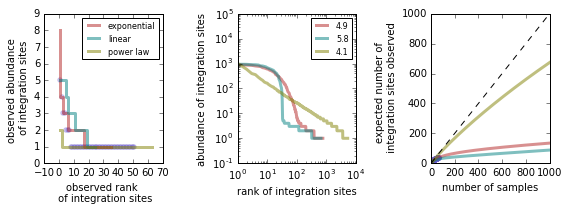

In [101]:
#heres an example
colorz=['firebrick','teal','olive']
titz=['exponential','linear','power law','data']

bt=0.05; al=0.8; m=30; u=10**3; a=10**3

test_model_list=[
        ra_model(number=1,model_type='exp',u_max=u,a_max=a,parameter=bt),
        ra_model(number=2,model_type='lin',u_max=u,a_max=a,parameter=m),
        ra_model(number=3,model_type='plw',u_max=u,a_max=a,parameter=al)
            ]

fig=plt.figure(figsize=(8,3),dpi=rez)

pat=1

num_rare_samples=1000

u_extrap=[]

#loop through 3 model types
for i in range(3):
    
    model=test_model_list[i]
        
    dist=model.populate_model(num_avgs=10)
    
    obs_rank_data, obs_abund_data, obs_rank_sim, obs_abund_sim, obs_cdf_data, obs_cdf_sim = calc_observed(dist,pat)
    
    print(titz[i],'error is', model.error_list[pat])
    
    actual_rank_sim,actual_abund_sim=rank_distribution(dist,num_samples=int(model.L))

    rare_n,rare_s=rarefaction_approx(actual_rank_sim,actual_abund_sim,num_samples=num_rare_samples)

    plt.subplot(131)
    plt.step(obs_rank_sim,obs_abund_sim,color=colorz[i],lw=3,alpha=0.5)
    plt.xlabel('observed rank \n of integration sites')
    plt.ylabel('observed abundance \n of integration sites')
        
    plt.subplot(132)
    plt.loglog(actual_rank_sim,actual_abund_sim,color=colorz[i],lw=3,alpha=0.5)
    plt.xlabel('rank of integration sites')
    plt.ylabel('abundance of integration sites')
    plt.ylim([0.1,1e5])
    
    plt.subplot(133)
    plt.plot(rare_n,rare_s,color=colorz[i],lw=3,alpha=0.5)
    plt.xlabel('number of samples')
    plt.ylabel('expected number of  \n integration sites observed')
    plt.xlim([0,rare_n[-1]])
    plt.ylim([0,rare_n[-1]])
    
    u_extrap.append(np.round(model.ufrac,3)*100)
    
plt.subplot(131)
plt.legend(titz,fontsize=8)
plt.scatter(obs_rank_data,obs_abund_data,marker=marker_list[pat],color=color_list[pat],alpha=0.3)

plt.subplot(132)
plt.legend(u_extrap,fontsize=8)

rare_n_data,rare_s_data=rarefaction(obs_rank_data,obs_abund_data,num_samples=int(sum(obs_abund_data)))
plt.subplot(133)
plt.scatter(rare_n_data,rare_s_data,marker=marker_list[pat],color=color_list[pat])
plt.plot(np.arange(0,rare_n[-1]),np.arange(0,rare_n[-1]),ls='--',color='k')

plt.tight_layout()
    


In [98]:
#ei=1
def make_exp(x):
    u,a,bt=x
    model=ra_model(number=0,model_type='exp',u_max=u,a_max=a,parameter=bt)
    dist=model.populate_model(num_avgs=1)
    #ei+=1
    return -model.error_list[0]



In [99]:
scipy.optimize.minimize(make_exp,x0=(1e4,100,0.05),bounds=((1,1e4),(100,1e3),(1e-3,1)))#, method='Nelder-Mead')

/Users/danielreeves/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/Users/danielreeves/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:56: RuntimeWarning: divide by zero encountered in log10


      fun: 1001.6651581673543
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1123175.38423667,  1123175.3836455 ,  1123176.53043874])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 84
      nit: 0
   status: 2
  success: False
        x: array([  1.00000000e+04,   1.00000000e+02,   5.00000000e-02])

/Users/danielreeves/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/Users/danielreeves/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:56: RuntimeWarning: divide by zero encountered in log10


exponential models
142.43694496154785
112.24963402748108
97.67558217048645
90.6674530506134
83.61791205406189
80.2534909248352
80.65538096427917
79.6322820186615
78.25507521629333
78.86276888847351
linear models
92.18802094459534
79.97704982757568
77.91233491897583
77.8187530040741
76.22836303710938
74.73829889297485
74.7463960647583
74.66628789901733
74.71835803985596
74.77641320228577
powerlaw models
235.60631489753723
96.30344820022583
81.32299304008484
78.19039297103882
76.27950286865234
76.56419110298157
76.67865300178528
76.54913306236267
76.73845720291138
76.99444007873535


/Users/danielreeves/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:54: RuntimeWarning: divide by zero encountered in log10


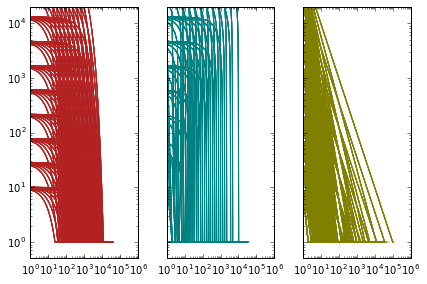

In [102]:
numz=10 #how many of each variable to try

p_range_list=[np.logspace(-3,-1,numz), np.logspace(1,4,numz), np.linspace(1,3,numz)] #exp,lin,plw

u_list=np.round(np.logspace(2,4.5,numz))
a_list=np.logspace(1,5,numz)

#initialize stuff
model_list=[[],[],[]]

NA=10

fig,axarr=plt.subplots(1,3,sharex=True,sharey=True,dpi=rez)

model_index=0
#make ALL THE MODELS and compute their errors
print('exponential models')
for bt in p_range_list[0]:
    t = time.time()
    for u in u_list:
        for a in a_list:
            model=ra_model(number=model_index,model_type='exp',u_max=u,a_max=a,parameter=bt)
            dist=model.populate_model(num_avgs=NA)
            axarr[0].loglog(np.arange(1,len(dist)+1),dist,color=colorz[0],alpha=0.5)
            model_list[0].append(model)
    print(time.time() - t)

print('linear models')
for m in p_range_list[1]:
    t = time.time()
    for u in u_list:
        for a in a_list:
            model=ra_model(number=model_index,model_type='lin',u_max=u,a_max=a,parameter=m)
            dist=model.populate_model(num_avgs=NA)
            axarr[1].loglog(np.arange(1,len(dist)+1),dist,color=colorz[1],alpha=0.5)
            model_list[1].append(model)
    print(time.time() - t)
         
print('powerlaw models')
for al in p_range_list[2]:
    t = time.time()
    for u in u_list:
        for a in a_list:
            model=ra_model(number=model_index,model_type='plw',u_max=u,a_max=a,parameter=al)
            dist=model.populate_model(num_avgs=NA)
            axarr[2].loglog(np.arange(1,len(dist)+1),dist,color=colorz[2],alpha=0.5)
            model_list[2].append(model)
    print(time.time() - t)

axarr[2].set_ylim([0.5,2e4])
fig.tight_layout()
fig.savefig('figures/examplemodelsSupp.pdf')

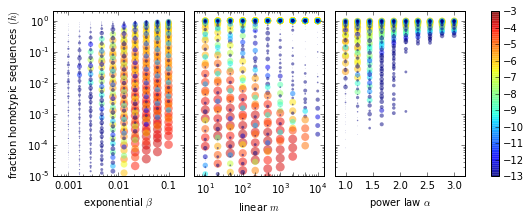

In [103]:
#fill up the best model parameters and plot a heatmap for 1 patient
best_m_list=[[],[],[]] #list of best models

patients=range(9); pat_to_plot=1

#plot all the heatmaps for each patient
fig, ax = plt.subplots(1,3,figsize=(8, 3),dpi=rez,sharey=True)
for pat in patients:
    p=[[],[],[]]; u=[[],[],[]]; err=[[],[],[]]; L_list=[[],[],[]]; m_list=[[],[],[]] 
    #3 types of models, process data
    for i in range(3):
        axz=ax[i]
        for j in range(len(model_list[i])):
            p[i].append(model_list[i][j].parameter)
            u[i].append(model_list[i][j].ufrac)
            err[i].append(model_list[i][j].error_list[pat])
            m_list[i].append(model_list[i][j])
            L_list[i].append(model_list[i][j].L)
            
        best_ind=np.argsort(-np.array(err[i]))[0]
        best_m_list[i].append(m_list[i][best_ind])

        if pat==pat_to_plot:
            x = np.array(p[i]); y = np.array(u[i]); z = np.array(err[i])    
                        
            #im=axz.scatter3(x,y,L_list,s=50,c=z,alpha=0.5,vmin=-100, vmax=-10, lw=0, cmap='jet')
            
            #im=axz.scatter(x,y,s=30,c=z,alpha=0.5,vmin=-10, vmax=-3, lw=0, cmap='jet')
            im=axz.scatter(x,y,s=-300/z,c=z,alpha=0.5,vmin=-13, vmax=-3, lw=0, cmap='jet')
            #im=axz.scatter(x,y,s=np.array(L_list[i])/1e4,c=z,alpha=0.5,vmin=-100, vmax=0, lw=0)

            axz.set_ylim([1e-5,2])
            axz.set_yscale('log')                
            if i==0:
                axz.set_xscale('log')
                axz.set_xlim([5e-4,0.2])
                axz.set_xticks(np.logspace(-3,-1,3))
                axz.set_xticklabels(np.logspace(-3,-1,3))

            if i==1:
                axz.set_xscale('log')
                axz.set_xlim([5,1.5e4])
                axz.set_xticks(np.logspace(1,4,10))

            if i==2:
                axz.set_xticks(np.linspace(1,3,5))
                axz.set_xlim([0.8,3.2])
            axz.set_xlabel(xlabs[i])
            
ax[0].set_ylabel(r'fraction homotypic sequences $(h)$')
fig.tight_layout()
fig.colorbar(im, ax=ax.ravel().tolist())#, ticks=np.arange(0,40,5))
plt.savefig('figures/fit_map'+str(pat_to_plot)+'.pdf')


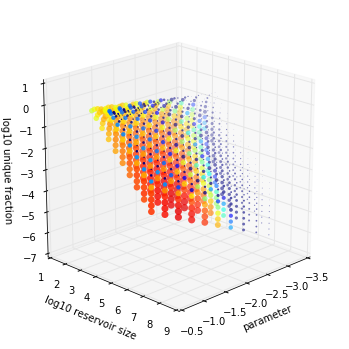

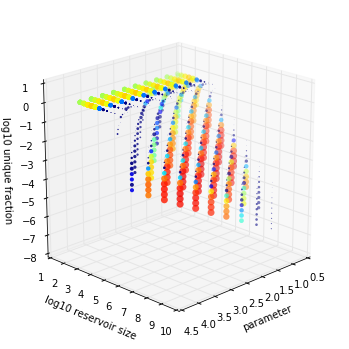

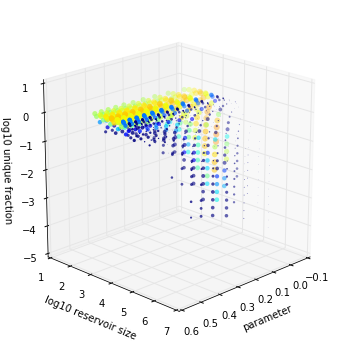

In [127]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


for i in range(3):

    fig = plt.figure(figsize=(6, 6),dpi=rez)
    axz = fig.add_subplot(111, projection='3d')
    axz.scatter(np.log10(p[i]),np.log10(L_list[i]),np.log10(u[i]),c=err[i],s=-200/np.array(err[i]),vmin=-13, vmax=-3,lw=0)
    axz.view_init(elev=20., azim=45.)
    
    axz.set_xlabel('parameter')
    axz.set_ylabel('log10 reservoir size')
    axz.set_zlabel('log10 unique fraction')
    
    #fig.tight_layout()


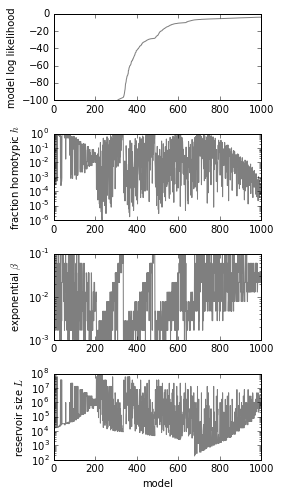

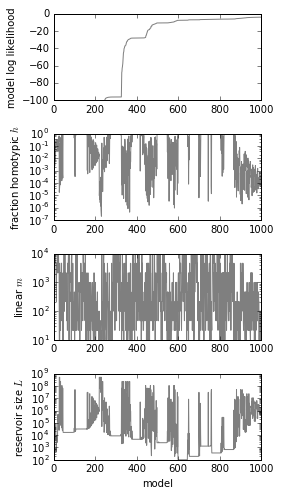

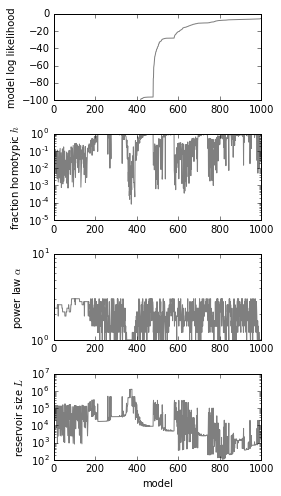

In [106]:
for m in range(3):
    plt.figure(figsize=(4,7),dpi=rez)

    inds=np.argsort(np.array(err[m]))

    plt.subplot(411)
    plt.plot(range(len(err[m])),np.array(err[m])[inds],color='k',lw=1,alpha=0.5)
    plt.ylim([-100,0])
    plt.xlim([0,len(inds)])
    plt.ylabel('model log likelihood')
    plt.subplot(412)
    plt.semilogy(range(len(u[m])),np.array(u[m])[inds],color='k',lw=1,alpha=0.5)
    plt.ylabel('fraction homotypic $h$')
    plt.xlim([0,len(inds)])
    plt.subplot(413)
    plt.semilogy(range(len(p[m])),np.array(p[m])[inds],color='k',lw=1,alpha=0.5)
    plt.ylabel(xlabs[m])
    plt.xlim([0,len(inds)])
    plt.subplot(414)
    plt.semilogy(range(len(L_list[m])),np.array(L_list[m])[inds],color='k',lw=1,alpha=0.5)
    plt.ylabel('reservoir size $L$')
    plt.xlabel('model')
    plt.xlim([0,len(inds)])

    plt.tight_layout()

    plt.savefig('figures/fitsummarylines'+str(m)+'.pdf')

exponential -3.62087579241 982209.321707 390
linear -3.53546636786 1790541.62349 377
power law

/Users/danielreeves/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/Users/danielreeves/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:56: RuntimeWarning: divide by zero encountered in log10
/Users/danielreeves/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:102: RuntimeWarning: divide by zero encountered in double_scalars


 -5.55870332856 1380.92481303 314


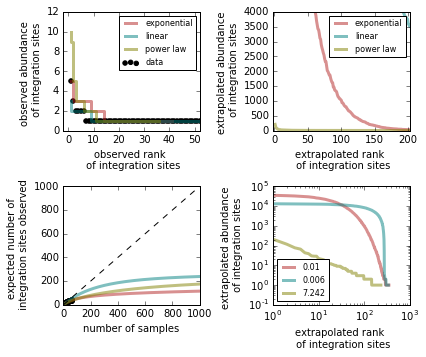

In [107]:
#compute the best model distribution and plot this for a given patient
pat=0

rez=600

#heres an example
colorz=['firebrick','teal','olive']
titz=['exponential','linear','power law','data']

fig=plt.figure(figsize=(6,5),dpi=rez)

pat=0

num_rare_samples=1000

u_extrap=[]

#loop through 3 model types
for i in range(3):
    
    model=best_m_list[i][pat]
        
    dist=model.populate_model(num_avgs=1)
    
    obs_rank_data, obs_abund_data, obs_rank_sim, obs_abund_sim, obs_cdf_data, obs_cdf_sim = calc_observed(dist,pat)
    
    print(titz[i],model.error_list[pat],model.L,model.richness)
    
    actual_rank_sim,actual_abund_sim=rank_distribution(dist,num_samples=int(model.L))

    rare_n,rare_s=rarefaction_approx(actual_rank_sim,actual_abund_sim,num_samples=num_rare_samples)

    plt.subplot(221)
    plt.step(obs_rank_sim,obs_abund_sim,color=colorz[i],lw=3,alpha=0.5)
    plt.xlabel('observed rank \n of integration sites')
    plt.ylabel('observed abundance \n of integration sites')
        
    plt.subplot(222)
    plt.plot(actual_rank_sim,actual_abund_sim,color=colorz[i],lw=3,alpha=0.5)
    plt.xlabel('extrapolated rank \n of integration sites')
    plt.ylabel('extrapolated abundance \n of integration sites')
 
    plt.subplot(223)
    plt.plot(rare_n,rare_s,color=colorz[i],lw=3,alpha=0.5)
    plt.xlabel('number of samples')
    plt.ylabel('expected number of  \n integration sites observed')
    plt.xlim([0,rare_n[-1]])
    plt.ylim([0,rare_n[-1]])

    plt.subplot(224)
    plt.loglog(actual_rank_sim,actual_abund_sim,color=colorz[i],lw=3,alpha=0.5)
    plt.xlabel('extrapolated rank \n of integration sites')
    plt.ylabel('extrapolated abundance \n of integration sites')
       
    u_extrap.append(np.round(model.ufrac,5)*100)

plt.subplot(222)
plt.legend(titz,fontsize=8)
plt.xlim([-2,202])
plt.ylim([0,4e3])

plt.subplot(221)
plt.scatter(obs_rank_data,obs_abund_data,marker=marker_list[pat],color='k')#color_list[pat],alpha=0.3)
plt.xlim([-2,52])
plt.legend(titz,fontsize=8)

rare_n_data,rare_s_data=rarefaction(obs_rank_data,obs_abund_data,num_samples=int(sum(obs_abund_data)))
plt.subplot(223)
plt.scatter(rare_n_data,rare_s_data,marker=marker_list[pat],color='k')#color_list[pat])
plt.plot(np.arange(0,rare_n[-1]),np.arange(0,rare_n[-1]),ls='--',color='k')

plt.subplot(224)
plt.legend(u_extrap,fontsize=8,loc=3)
plt.ylim([0.1,1e5])

plt.tight_layout()
    
plt.savefig('figures/best_model_plots.pdf')

/Users/danielreeves/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/Users/danielreeves/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:56: RuntimeWarning: divide by zero encountered in log10


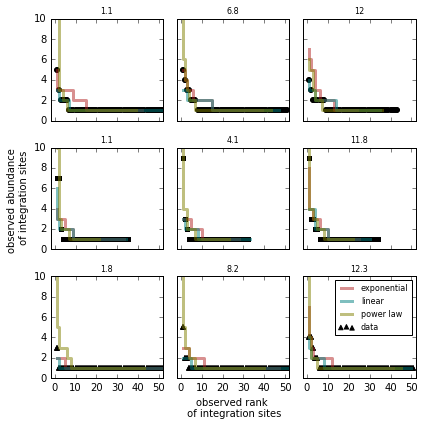

In [128]:
#plot the best fits for each patient
rez=600

fig,axarr=plt.subplots(3,3,figsize=(6,6),dpi=rez,sharex=True,sharey=True)

#compute the best model distribution and plot this for a given patient
for pat in range(9):
    
    #loop through 3 model types
    for i in range(3):

        ax=axarr[int(pat/3)][pat%3]
        
        model=best_m_list[i][pat]

        dist=model.populate_model(num_avgs=1)

        obs_rank_data, obs_abund_data, obs_rank_sim, obs_abund_sim, obs_cdf_data, obs_cdf_sim = calc_observed(dist,pat)

        ax.step(obs_rank_sim,obs_abund_sim,color=colorz[i],lw=3,alpha=0.5)
        ax.set_title(t_list[pat],fontsize=8)
        
        ax.scatter(obs_rank_data,obs_abund_data,marker=marker_list[pat],color='k')#color_list[pat],alpha=0.3)

ax.set_xlim([-2,52])
ax.set_ylim([0,10])
ax.legend(titz,fontsize=8)

axarr[2][1].set_xlabel('observed rank \n of integration sites')
axarr[1][0].set_ylabel('observed abundance \n of integration sites')

plt.tight_layout()

plt.savefig('figures/best_model_plots_suppALL_fits.pdf')

/Users/danielreeves/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/Users/danielreeves/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:56: RuntimeWarning: divide by zero encountered in log10


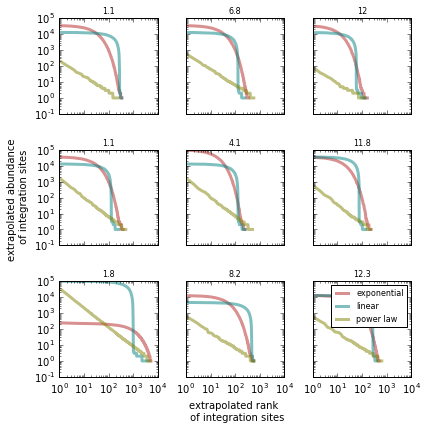

In [131]:
#plot the best fits for each patient
rez=600

fig,axarr=plt.subplots(3,3,figsize=(6,6),dpi=rez,sharex=True,sharey=True)

#compute the best model distribution and plot this for a given patient
for pat in range(9):
    
    #loop through 3 model types
    for i in range(3):

        ax=axarr[int(pat/3)][pat%3]
        
        model=best_m_list[i][pat]

        dist=model.populate_model(num_avgs=1)

        obs_rank_data, obs_abund_data, obs_rank_sim, obs_abund_sim, obs_cdf_data, obs_cdf_sim = calc_observed(dist,pat)

        actual_rank_sim,actual_abund_sim=rank_distribution(dist,num_samples=int(model.L))
        
        ax.loglog(actual_rank_sim,actual_abund_sim,color=colorz[i],lw=3,alpha=0.5)
        ax.set_title(t_list[pat],fontsize=8)
        
plt.ylim([0.8,1e6])
ax.legend(titz,fontsize=8)

axarr[2][1].set_xlabel('extrapolated rank \n of integration sites')
axarr[1][0].set_ylabel('extrapolated abundance \n of integration sites')

plt.tight_layout()

plt.savefig('figures/best_model_plots_suppALL_extrap.pdf')

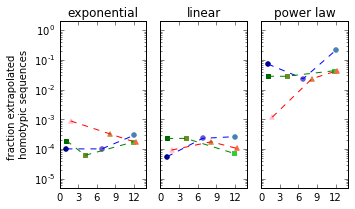

In [108]:
fig, ax = plt.subplots(1,3,figsize=(5, 3),dpi=rez,sharex=True,sharey=True)
best_u=[[],[],[]]
for pat in patients:
    for i in range(3):
        model=best_m_list[i][pat]

        uu=model.ufrac

        ax[i].scatter(t_list[pat],uu,marker=marker_list[pat],color=color_list[pat])
        
        best_u[i].append(uu)

if len(best_u[1])==9:
    for i in range(3):
        ax[i].semilogy(t_list[:3],best_u[i][:3],ls='--',color='blue')
        ax[i].plot(t_list[3:6],best_u[i][3:6],ls='--',color='green')
        ax[i].plot(t_list[6:],best_u[i][6:],ls='--',color='red')
        ax[i].set_title(titz[i])
        ax[i].set_ylim([5e-6,2])
ax[0].set_ylabel('fraction extrapolated \n homotypic sequences') 
#ax[1].set_xlabel('time on ART (years)')   
ax[0].set_xticks(np.arange(0,13,3))
#ax[0].set_yscale('log')
plt.tight_layout()
plt.savefig('figures/unique_extrap.pdf')

In [109]:
#just print the values
print(r'largest clone & model param & res size & homotypic frac & richness & likelihood \\')
pat=0
for i in range(3):
    m=best_m_list[i][pat]
    
    print(m.model_type,'&',m.a_max,'&',m.parameter,'&',m.L,'&',m.ufrac,'&',m.richness,'&',m.error_list[0],r'\\')
    


largest clone & model param & res size & homotypic frac & richness & likelihood \\
exp & 35938.136638 & 0.035938136638 & 982209.321707 & 0.000101811291942 & 390 & -3.62087579241 \\
lin & 12915.4966501 & 46.4158883361 & 1790541.62349 & 5.58490228255e-05 & 377 & -3.53546636786 \\
plw & 215.443469003 & 1.0 & 1380.92481303 & 0.0724152387272 & 314 & -5.55870332856 \\
